In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import joblib
import os

In [14]:
url = 'https://raw.githubusercontent.com/Projetos-III-UFPA-2024-4/engenheiros-do-acaii/main/Modelos%20-%20Previs%C3%A3o/Dados/Dataset_Final_do_Inversor_Solar.csv'
data = pd.read_csv(url, sep=',')
print(data.head())

             timestamp  hora  minuto  DP1  energia_gerada_kWh
0  2025-03-01 00:00:00     0       0  0.0                 0.0
1  2025-03-01 00:15:00     0      15  0.0                 0.0
2  2025-03-01 00:30:00     0      30  0.0                 0.0
3  2025-03-01 00:45:00     0      45  0.0                 0.0
4  2025-03-01 01:00:00     1       0  0.0                 0.0


In [15]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [16]:
# Preparando dados para Prophet
df = data.reset_index()[["timestamp", "energia_gerada_kWh"]]
df.columns = ["ds", "y"]

In [17]:
df.tail()

,ds,y
2875,2025-03-30 22:45:00,0.0
2876,2025-03-30 23:00:00,0.0
2877,2025-03-30 23:15:00,0.0
2878,2025-03-30 23:30:00,0.0
2879,2025-03-30 23:45:00,0.0


In [23]:
# 🔹 Criar o modelo Prophet e treinar
modelo = Prophet()
modelo.fit(df)

22:05:31 - cmdstanpy - INFO - Chain [1] start processing
22:05:31 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# 🔹 Fazer previsão para os próximos 30 dias
futuro = modelo.make_future_dataframe(periods=30, freq="15T")
previsao = modelo.predict(futuro)

C:\Users\thzli\AppData\Roaming\Python\Python313\site-packages\prophet\forecaster.py:1854: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


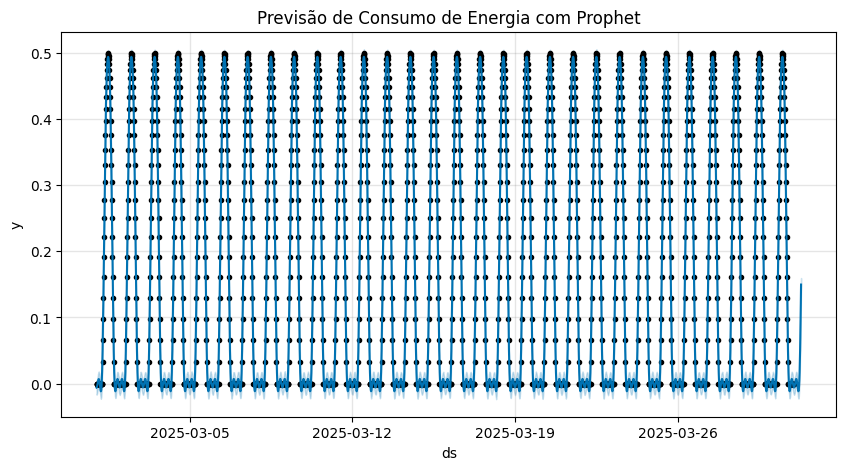

In [25]:
# 🔹 Plotar a previsão
fig, ax = plt.subplots(figsize=(10, 5))
modelo.plot(previsao, ax=ax)
plt.title("Previsão de Consumo de Energia com Prophet")
plt.show()

In [30]:
joblib.dump(modelo, "modelo_prophet.pkl")

['modelo_prophet.pkl']